In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Explore Moment Concept

Binary Image (0=black, 1=white):
[[0 0 1 1 0]
 [0 0 1 1 0]
 [0 0 1 1 0]]

=== SPATIAL MOMENTS (mᵢⱼ) ===
m00 = 6.0 (Area - sum of all white pixels)
m10 = 15.0 (Sum of x-coordinates of white pixels)
m01 = 6.0 (Sum of y-coordinates of white pixels)
m20 = 39.0 (Sum of x²)
m11 = 15.0 (Sum of x*y)
m02 = 10.0 (Sum of y²)
m30 = 105.0 (Sum of x³)
m21 = 39.0 (Sum of x²*y)
m12 = 25.0 (Sum of x*y²)
m03 = 18.0 (Sum of y³)

=== CENTRAL MOMENTS (μᵢⱼ) ===
mu20 = 1.50 (Variance along x-axis)
mu11 = 0.00 (Covariance between x and y)
mu02 = 4.00 (Variance along y-axis)
mu30 = 0.00 (Skewness along x-axis)
mu21 = 0.00
mu12 = 0.00
mu03 = 0.00 (Skewness along y-axis)

=== NORMALIZED MOMENTS (νᵢⱼ) ===
nu20 = 0.0417
nu11 = 0.0000
nu02 = 0.1111
nu30 = 0.0000
nu21 = 0.0000
nu12 = 0.0000
nu03 = 0.0000

=== DERIVED PROPERTIES ===
Centroid (cx, cy) = (2.50, 1.00)
Orientation angle = 90.00°

=== HU MOMENTS (invariant) ===
Hu[0] = 0.152778
Hu[1] = 0.004823
Hu[2] = 0.000000
Hu[3] = 0.000000
Hu[4] = 0.000000
Hu[5] = 0.

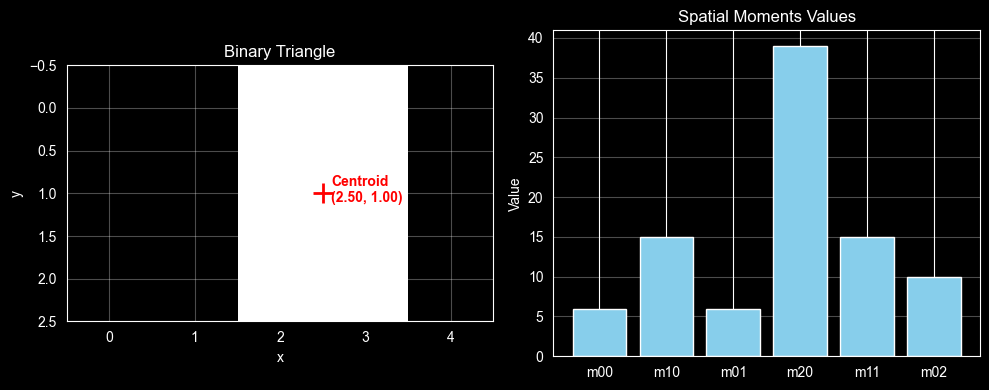

In [8]:
# Create a simple 5x5 binary image of a right triangle
# 0 = black (background), 255 = white (foreground)
triangle_binary = np.array([
    # [0, 0, 0, 0, 255],
    # [0, 0, 0, 255, 255],
    [0, 0, 255, 255, 0],
    [0, 0, 255, 255, 0],
    [0, 0, 255, 255, 0],
    # [0, 255, 255, 255, 255],
    # [255, 255, 255, 255, 255]
], dtype=np.uint8)

triangle_binary //= 255
print("Binary Image (0=black, 1=white):")
print(triangle_binary)  # Show as 0/1 for clarity
# Calculate moments
M = cv.moments(triangle_binary, binaryImage=True)

print("\n=== SPATIAL MOMENTS (mᵢⱼ) ===")
print(f"m00 = {M['m00']} (Area - sum of all white pixels)")
print(f"m10 = {M['m10']} (Sum of x-coordinates of white pixels)")
print(f"m01 = {M['m01']} (Sum of y-coordinates of white pixels)")
print(f"m20 = {M['m20']} (Sum of x²)")
print(f"m11 = {M['m11']} (Sum of x*y)")
print(f"m02 = {M['m02']} (Sum of y²)")
print(f"m30 = {M['m30']} (Sum of x³)")
print(f"m21 = {M['m21']} (Sum of x²*y)")
print(f"m12 = {M['m12']} (Sum of x*y²)")
print(f"m03 = {M['m03']} (Sum of y³)")

print("\n=== CENTRAL MOMENTS (μᵢⱼ) ===")
print(f"mu20 = {M['mu20']:.2f} (Variance along x-axis)")
print(f"mu11 = {M['mu11']:.2f} (Covariance between x and y)")
print(f"mu02 = {M['mu02']:.2f} (Variance along y-axis)")
print(f"mu30 = {M['mu30']:.2f} (Skewness along x-axis)")
print(f"mu21 = {M['mu21']:.2f}")
print(f"mu12 = {M['mu12']:.2f}")
print(f"mu03 = {M['mu03']:.2f} (Skewness along y-axis)")

print("\n=== NORMALIZED MOMENTS (νᵢⱼ) ===")
print(f"nu20 = {M['nu20']:.4f}")
print(f"nu11 = {M['nu11']:.4f}")
print(f"nu02 = {M['nu02']:.4f}")
print(f"nu30 = {M['nu30']:.4f}")
print(f"nu21 = {M['nu21']:.4f}")
print(f"nu12 = {M['nu12']:.4f}")
print(f"nu03 = {M['nu03']:.4f}")

# Calculate derived properties
if M['m00'] != 0:
    # 1. Centroid (center of mass)
    cx = M['m10'] / M['m00']
    cy = M['m01'] / M['m00']

    print(f"\n=== DERIVED PROPERTIES ===")
    print(f"Centroid (cx, cy) = ({cx:.2f}, {cy:.2f})")

    # 2. Orientation
    mu20 = M['mu20'] / M['m00']
    mu02 = M['mu02'] / M['m00']
    mu11 = M['mu11'] / M['m00']
    orientation = 0.5 * np.arctan2(2 * mu11, mu20 - mu02)
    print(f"Orientation angle = {np.degrees(orientation):.2f}°")

    # 3. Hu Moments (7 invariant moments)
    hu = cv.HuMoments(M)
    print("\n=== HU MOMENTS (invariant) ===")
    for i in range(7):
        print(f"Hu[{i}] = {hu[i][0]:.6f}")


# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Show binary image
axes[0].imshow(triangle_binary, cmap='gray')
axes[0].set_title('Binary Triangle')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(True, alpha=0.3)

# Mark centroid
axes[0].plot(cx, cy, 'r+', markersize=15, markeredgewidth=2)
axes[0].text(cx+0.1, cy+0.1, f'Centroid\n({cx:.2f}, {cy:.2f})',
            color='red', fontweight='bold')

# Create a bar chart of moments
moments_names = ['m00', 'm10', 'm01', 'm20', 'm11', 'm02']
moments_values = [M['m00'], M['m10'], M['m01'], M['m20'], M['m11'], M['m02']]

axes[1].bar(moments_names, moments_values, color='skyblue')
axes[1].set_title('Spatial Moments Values')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Use Moment

In [9]:
balloon_image = cv.imread('../../../class.vision/images/balloon.png')
shapes_image = cv.imread('../../../class.vision/images/shapes2.png')

### Centroid of each shape

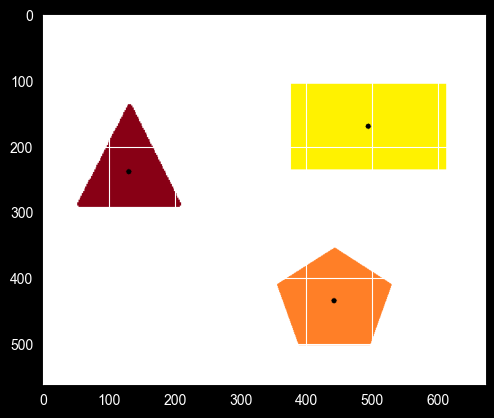

In [15]:
gray = cv.cvtColor(shapes_image, cv.COLOR_BGR2GRAY)

# Binarize image
_, binary_image = cv.threshold(gray, 245, 255, cv.THRESH_BINARY_INV)

contours, _ = cv.findContours(binary_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

draw_img = shapes_image.copy()

for shape in contours:
    M = cv.moments(shape)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv.circle(draw_img, (cx, cy), 4, (0, 0, 0), -1)

plt.imshow(draw_img[...,::-1])

### Sort shapes with contour-area

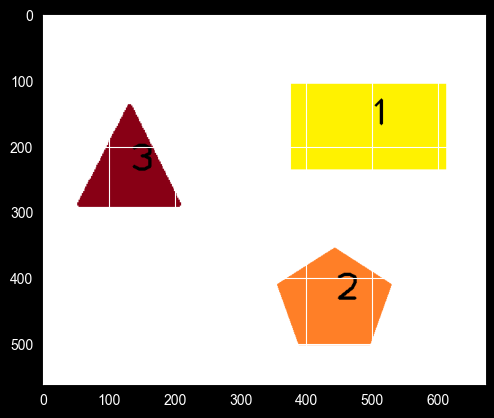

In [26]:
gray = cv.cvtColor(shapes_image, cv.COLOR_BGR2GRAY)
_, binary_image = cv.threshold(gray, 245, 255, cv.THRESH_BINARY_INV)
contours, _ = cv.findContours(binary_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
draw_img = shapes_image.copy()

shapes = []

for shape in contours:
    area = cv.contourArea(shape)
    M = cv.moments(shape)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    shapes.append({"contour":shape, "area":area, "centroid": (cx, cy)})

shapes.sort(key=lambda x: x["area"], reverse=True)

for idx, shape in enumerate(shapes):
    cv.putText(draw_img, str(idx + 1), org=shape["centroid"], fontFace=cv.FONT_HERSHEY_PLAIN, fontScale=4, color=(0, 0, 0), thickness=3)


plt.imshow(draw_img[...,::-1])

### Sort by Cx position

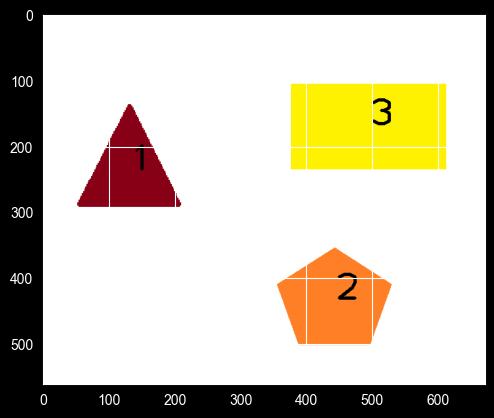

In [27]:
gray = cv.cvtColor(shapes_image, cv.COLOR_BGR2GRAY)
_, binary_image = cv.threshold(gray, 245, 255, cv.THRESH_BINARY_INV)
contours, _ = cv.findContours(binary_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
draw_img = shapes_image.copy()

shapes = []

for shape in contours:
    area = cv.contourArea(shape)
    M = cv.moments(shape)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    shapes.append({"contour":shape, "area":area, "centroid": (cx, cy)})

shapes.sort(key=lambda x: x["centroid"][0])

for idx, shape in enumerate(shapes):
    cv.putText(draw_img, str(idx + 1), org=shape["centroid"], fontFace=cv.FONT_HERSHEY_PLAIN, fontScale=4, color=(0, 0, 0), thickness=3)


plt.imshow(draw_img[...,::-1])